# Problems 9 - SVM Classification

In this practical exercise we will use sklearn to try different classifiers we have learnt on the same dataset, and compare performance. We will be using the sklearn library.

The problem we will study is the classification of image patches into text or non-text. For this purpose, we have already extracted image patches, and we have already extracted features from them. The features we will be using are Bag of Word features - if you are interested in the procedure to extract them, see the separate notebook provided.

In [ ]:
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the images (patches)

with gzip.open('./raw_pixels_dataset_5980.pklz','rb') as f:
  (train_labels,train_images,test_labels,test_images) = pickle.load(f, encoding='latin1')

In [ ]:
import pickle
import gzip

# Load the train and test datasets

with gzip.open('./BoW_train_features.pklz','rb') as f:
 (train_labels,train_features) = pickle.load(f)
    
with gzip.open('./BoW_test_features.pklz','rb') as f:
 (test_labels,test_features) = pickle.load(f)

Train_images shape (11960, 1024)
Test_images shape  (10396, 1024)


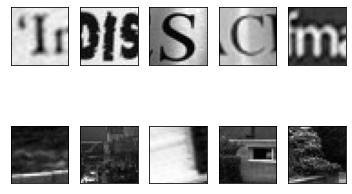

In [ ]:
print("Train_images shape " + str(train_images.shape))
print("Test_images shape  " + str(test_images.shape))

# Show a few samples of the positive and negative classes.
train_class0=train_images[train_labels == 0]
num_class0 = train_class0.shape[0]
train_class1=train_images[train_labels == 1]
num_class1 = train_class1.shape[0]

fig = plt.figure()
for i in range(1,6):
    ax = fig.add_subplot(2, 5, i)
    ax.imshow(np.reshape(train_class1[np.random.randint(0,num_class1),:],[32,32]), cmap=plt.cm.gray)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = fig.add_subplot(2, 5, i+5)
    ax.imshow(np.reshape(train_class0[np.random.randint(0,num_class0),:],[32,32]), cmap=plt.cm.gray)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# 9.1 Logistic Regression classification

Train a Logistic Regression classifier with the given image features.

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, max_iter = 10000)
clf.fit(train_features, train_labels)

LogisticRegression(max_iter=10000, random_state=0)

<font color=blue>Calculate the Test Accuracy</font>

In [ ]:
# Your Code Here

clf.score(test_features, test_labels)

0.8543670642554829

<font color=blue>Show the confusion matrix (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)</font>

In [ ]:
# Your Code Here

from sklearn.metrics import confusion_matrix
y_pred = clf.predict(test_features)
confusion_matrix(test_labels, y_pred)

array([[4366,  832],
       [ 682, 4516]], dtype=int64)

Show a few random examples, along with the predicted label, and the probability score of logistic regression

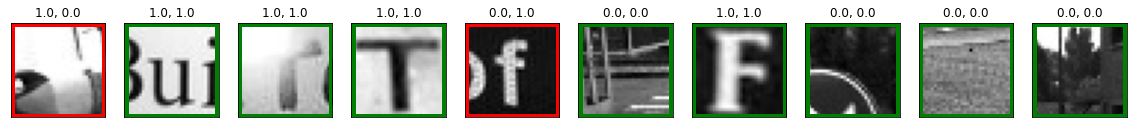

In [ ]:
import matplotlib.patches as patches

nImages = 10 # We will display nImages

fig, axs = plt.subplots(1, nImages, figsize = (2 * nImages, 2))

# Choose nImages random indices from the test set, and then pass the corresponding images through our model
idxs = np.random.randint(0, test_images.shape[0], size = nImages)
y_pred = clf.predict(test_features[idxs])

# Draw
for ax, i, o in zip(axs, idxs, y_pred):
    ax.imshow(np.reshape(test_images[i, :],[32,32]), cmap=plt.cm.gray)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("{}, {}".format(o, test_labels[i]))
    rect = patches.Rectangle((0, 0), 31, 31, linewidth=5, edgecolor=("green" if o == test_labels[i] else "red"), facecolor= "none")
    ax.add_patch(rect)

# 9.2 k-NN Classification

Train a K-NN classifier for text/non-text classification with the given image features. Use k = 5.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(train_features, train_labels)

KNeighborsClassifier()

<font color=blue>Calculate the Test Accuracy</font>

In [ ]:
# Your Code Here

clf.score(test_features, test_labels)

0.8140631011927665

<font color=blue>Show the confusion matrix</font>

In [ ]:
# Your Code Here

from sklearn.metrics import confusion_matrix
y_pred = clf.predict(test_features)
confusion_matrix(test_labels, y_pred)

array([[4073, 1125],
       [ 808, 4390]], dtype=int64)

<font color=blue>Compare the Accuracy using different values of k for the k-NN classifier with the Accuracy of the Logistic Regression classifier. Try for $k \in {1, 5, 10, 100, 200}$. You can change the number of nearest neighbours using the function `set_params(n_neighbors = X)`. Fill in the following table with your results.</font>

In [ ]:
# Your Code Here

for n in [1, 5, 10, 100, 200]:
    clf.set_params(n_neighbors=n)
    clf.fit(train_features, train_labels)
    sc = clf.score(test_features, test_labels)
    print(n, sc)

1 0.7840515582916506
5 0.8140631011927665
10 0.8207002693343594
100 0.8196421700654097
200 0.8166602539438246


---

*Your Answer Here*

| Method              | Accuracy  |
|---------------------|-----------|
| Logistic Regression | 0.8543    |
| kNN (K = 1)         | 0.7840    |
| kNN (K = 5)         | 0.8141    |
| kNN (K = 10)        | 0.8207    |
| kNN (K = 100)       | 0.8196    |
| kNN (K = 200)       | 0.8167    |

---

<font color=blue>Comment the advantages/disadvantages of each classifier.</font>

---
*Your Answer Here*

k-NN seems to be struggling in this scenario, maximum performance is around 0.82. It also takes much more time to do the prediction

---

Show a few random examples, along with the predicted label, and the probability score of logistic regression

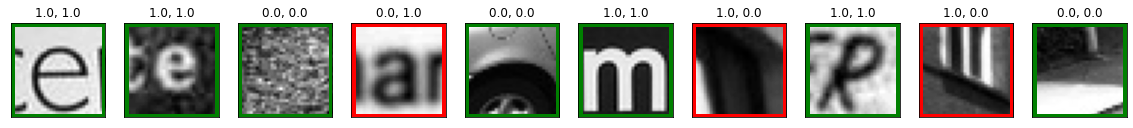

In [ ]:
import matplotlib.patches as patches

nImages = 10 # We will display nImages

fig, axs = plt.subplots(1, nImages, figsize = (2 * nImages, 2))

# Choose nImages random indices from the test set, and then pass the corresponding images through our model
idxs = np.random.randint(0, test_images.shape[0], size = nImages)
out = clf.predict(test_features[idxs])

# Draw
for ax, i, o in zip(axs, idxs, out):
    ax.imshow(np.reshape(test_images[i, :],[32,32]), cmap=plt.cm.gray)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("{}, {}".format(o, test_labels[i]))
    rect = patches.Rectangle((0, 0), 31, 31, linewidth=5, edgecolor=("green" if o == test_labels[i] else "red"), facecolor= "none")
    ax.add_patch(rect)

# 9.3 SVM Classification

We will now train an SVM classifier for text/non-text classification with the given image features.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

To start with, we will use a linear kernel. A Linear kernel is the simplest kernel function and has no parameters. It is given by the inner product <x,y>:

$k(x,y) = x^T y$

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(train_features, train_labels)

SVC(kernel='linear')

<font color=blue>Calculate the Test Accuracy</font>

In [ ]:
# Your Code Here

clf.score(test_features, test_labels)

0.8546556367833782

<font color=blue>Show the confusion matrix</font>

In [ ]:
# Your Code Here

from sklearn.metrics import confusion_matrix
y_pred = clf.predict(test_features)
confusion_matrix(test_labels, y_pred)

array([[4362,  836],
       [ 675, 4523]], dtype=int64)

## 9.3.1 Grid search for the parameters

The effectiveness of SVM depends on the selection of kernel, the kernel's parameters (if any), and the soft margin parameter C.

The best value for the soft margin parameter C is often picked with an exhaustive search strategy, for example, checking all possible values $C \in \{ 2^{-5}, 2^{-3}, \dots, 2^{13},2^{15} \}$. 

`sklearn.model_selection.GridSearchCV` performs a grid search over specified parameter values for an estimator. In our case, we will use it with an `svm.SVC` classifier to find the best value for the soft margin parameter C.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

The Grid Search class implements the `fit()` and `predict()` methods like all sklearn classifiers, except that the parameters of the classifier used to predict is optimized by cross-validation. Each possible combination of parameter choices is checked using cross validation, and the parameters with best cross-validation accuracy are picked. 

In [ ]:
# Grid search for SVM parameter C
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.1, 1, 10]} # Checking only three possible values for the C parameter
clf = svm.SVC(kernel='linear') # Linear kernel
grid = GridSearchCV(clf, parameters)
grid.fit(train_features, train_labels)

print("The best parameters are {} with a score of {:0.2f}".format(grid.best_params_, grid.best_score_))

The best parameters are {'C': 1} with a score of 0.87


<font color=blue>Calculate the Test Accuracy using the best value for C</font>

In [ ]:
# Your Code Here

clf = svm.SVC(kernel='linear', C = 1)
clf.fit(train_features, train_labels)
clf.score(test_features, test_labels)

0.8546556367833782

## 9.3.2 Using an RBF (Radial Basis Function) Kernel

Another common choice for the kernel is the Gaussian kernel (an example of radial basis function kernel), which has a single parameter $\gamma$:

$k(x, y) = \exp{(- \gamma \lVert x-y \rVert ^2 )}$

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(train_features, train_labels)

SVC()

<font color=blue>Calculate the Test Accuracy</font>

In [ ]:
# Your Code Here

clf.score(test_features, test_labels)

0.8766833397460562

<font color=blue>Show the confusion matrix</font>

In [21]:
# Your Code Here

from sklearn.metrics import confusion_matrix
y_pred = clf.predict(test_features)
confusion_matrix(test_labels, y_pred)

array([[4513,  685],
       [ 597, 4601]], dtype=int64)

<font color=blue>Do a grid search for different values of C and $\gamma$, for example $C \in \{0.1, 1, 10\}$; $\gamma \in \{0.01, 0.1, 1\}$, then use the best parameters to retrain your classifier. </font>

*Note: If you are going to check a large number of parameter combinations `GridSearchCV` is going to take a long time to finish. By setting the `verbosity` parameter equal to $10$ you will be able to see intermediate results, and select the best ones even if the search has not finished:*

`grid = grid_search.GridSearchCV(classifier, parameters, verbose=10)`

In [22]:
# Your Code Here

from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.1, 1, 10], 'gamma':[0.01, 0.1, 1]} # Checking only three possible values for the C parameter
clf = svm.SVC(kernel='rbf') # Linear kernel
grid = GridSearchCV(clf, parameters, verbose=10)
grid.fit(train_features, train_labels)

print("The best parameters are {} with a score of {:0.2f}".format(grid.best_params_, grid.best_score_))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START C=0.1, gamma=0.01...........................................
[CV 1/5; 1/9] END ............C=0.1, gamma=0.01;, score=0.865 total time=   9.1s
[CV 2/5; 1/9] START C=0.1, gamma=0.01...........................................
[CV 2/5; 1/9] END ............C=0.1, gamma=0.01;, score=0.848 total time=   9.0s
[CV 3/5; 1/9] START C=0.1, gamma=0.01...........................................
[CV 3/5; 1/9] END ............C=0.1, gamma=0.01;, score=0.860 total time=   9.3s
[CV 4/5; 1/9] START C=0.1, gamma=0.01...........................................
[CV 4/5; 1/9] END ............C=0.1, gamma=0.01;, score=0.852 total time=   9.0s
[CV 5/5; 1/9] START C=0.1, gamma=0.01...........................................
[CV 5/5; 1/9] END ............C=0.1, gamma=0.01;, score=0.853 total time=   8.9s
[CV 1/5; 2/9] START C=0.1, gamma=0.1............................................
[CV 1/5; 2/9] END .............C=0.1, gamma=0.1;,

In [23]:
# Your Code Here (cont.)

clf = svm.SVC(kernel='rbf', C = 10, gamma = 0.1)
clf.fit(train_features, train_labels)
clf.score(test_features, test_labels)

0.8724509426702578

<font color=blue>Add all your new results up to now in the table.</font>

---

*Your Answer Here*

| Method              | Accuracy  |
|---------------------|-----------|
| Logistic Regression | 0.8543    |
| kNN (K = 1)         | 0.7840    |
| kNN (K = 5)         | 0.8141    |
| kNN (K = 10)        | 0.8207    |
| kNN (K = 100)       | 0.8196    |
| kNN (K = 200)       | 0.8167    |
| SVM (Linear, C=?)   | 0.8546    |
| SVM (RBF, Default)  | 0.8767    |
| SVM (RBF, C=?, g=?) | 0.8724    |

---

## 9.3.3 Exploring more kernels

In the scikit-learn SVM implementation, the kernel function can be any of the following:

* 'linear'     : Linear kernel, $k(x,y) = x^T y$, it has no parameters
* 'poly'       : Polynomial kernel, $k(x,y) = (\gamma x^T y + r)^d$, where $d$ is the degree specified by the parameter `degree`, and $r$ is an independent term specificed by the parameter `coef0`
* 'rbf'        : Radial Basis Function kernel. $k(x, y) = \exp{(- \gamma \lVert x-y \rVert ^2 )}$, it has one parameter: 'gamma' specified by the parameter `gamma`
* 'sigmoid'    : A sigmoid shaped function, $k(x,y) = tanh(\gamma (x^T y) + r)$, where $\gamma$ is specified by `gamma` and $r$ is an independent term specificed by the parameter `coef0`
* 'precomputed': Allows you to pass to the function pre-computed kernels. You should then pass the Gram matrix instead of X to the fit and predict methods.
* or callable  : You can define your own python function to call

<font color=blue>Repeat the exercise with the polynomial kernel, trying different values for $C$ and for the degree $d$, and add your result to the table.</font>

In [24]:
# Your Code Here

from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.1, 1, 10], 'degree':[2, 5, 10]} # Checking only three possible values for the C parameter
clf = svm.SVC(kernel='poly') # Linear kernel
grid = GridSearchCV(clf, parameters, verbose=10)
grid.fit(train_features, train_labels)

print("The best parameters are {} with a score of {:0.2f}".format(grid.best_params_, grid.best_score_))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START C=0.1, degree=2.............................................
[CV 1/5; 1/9] END ..............C=0.1, degree=2;, score=0.887 total time=   5.0s
[CV 2/5; 1/9] START C=0.1, degree=2.............................................
[CV 2/5; 1/9] END ..............C=0.1, degree=2;, score=0.883 total time=   4.8s
[CV 3/5; 1/9] START C=0.1, degree=2.............................................
[CV 3/5; 1/9] END ..............C=0.1, degree=2;, score=0.893 total time=   4.7s
[CV 4/5; 1/9] START C=0.1, degree=2.............................................
[CV 4/5; 1/9] END ..............C=0.1, degree=2;, score=0.881 total time=   4.9s
[CV 5/5; 1/9] START C=0.1, degree=2.............................................
[CV 5/5; 1/9] END ..............C=0.1, degree=2;, score=0.882 total time=   4.5s
[CV 1/5; 2/9] START C=0.1, degree=5.............................................
[CV 1/5; 2/9] END ..............C=0.1, degree=5;,

In [28]:
# Your Code Here (cont.)

clf = svm.SVC(kernel='poly', C = 1, degree = 2) # Polynomial kernel
clf.fit(train_features, train_labels)
clf.score(test_features, test_labels)

0.8711042708734128

---

*Your Answer Here*

| Method              | Accuracy  |
|---------------------|-----------|
| Logistic Regression | 0.8543    |
| kNN (K = 1)         | 0.7840    |
| kNN (K = 5)         | 0.8141    |
| kNN (K = 10)        | 0.8207    |
| kNN (K = 100)       | 0.8196    |
| kNN (K = 200)       | 0.8167    |
| SVM (Linear, C=?)   | 0.8546    |
| SVM (RBF, Default)  | 0.8767    |
| SVM (RBF, C=?, g=?) | 0.8724    |
| SVM (Poly, C=?, d=?)| 0.8711    |

---

Apart from the pre-defined kernels in scikit learn we can create a classifier with our own custom kernel by giving the kernel as a python function. In the following list you have some kernel functions that are commonly used:

###  Chi-Square Kernels

The Chi-Square kernel comes from the Chi-Square distribution. This kernel is most commonly applied to histograms.

$k(x,y) = 1 - \sum_{i=1}^n \frac{(x_i-y_i)^2}{\frac{1}{2}(x_i+y_i)}$

Appart of the normal Chi-Square kernel, other popular definitions of Chi Squared kernels include the normalized Chi-Square kernel:

$k(x,y) = \sum_{i=1}^n \frac{(x_i*y_i)}{(x_i+y_i)}$

and the exponential Chi-Squared kernel:

$k(x,y) = \exp{(-\gamma \sum_{i=1}^n \frac{(x_i-y_i)^2}{(x_i+y_i)})}$



### Histogram Intersection Kernel

The Histogram Intersection Kernel is also known as the Min Kernel and has been proven useful in image classification.

$k(x,y) = \sum_{i=1}^n min(x_i,y_i)$



### Generalized Histogram Intersection

The Generalized Histogram Intersection kernel is built based on the Histogram Intersection Kernel for image classification but applies in a much larger variety of contexts (Boughorbel, 2005). It is given by:

$k(x,y) = \sum_{i=1}^m min(|x_i|^\alpha,|y_i|^\beta)$


The following cell of code shows how to make use of a python function as a custom kernel in `svm.SVC`. In this case it implements the Linear kernel.

In [27]:
import numpy as np
from sklearn import svm

def my_kernel(x, y): 
    return np.dot(x, y.T) #Linear kernel (dot product)

classifier = svm.SVC(kernel=my_kernel)

classifier = classifier.fit(train_features, train_labels)

print( "Train Accuracy : " + str(classifier.score(train_features, train_labels)))

Train Accuracy : 0.8767558528428093


<font color='blue'>[OPTIONAL] Select one of the kernel functions listed above and implement it as a Python function. Then calculate the performance with your selected kernel and add it in the table</font>

*Note: Training and testing the classifier with your own kernel function may be very slow if the kernel function is not vectorized.*

In [ ]:
# Your Code Here



<font color='blue'>Finally, pick and train the best classifier you have found, and then show a few examples using the code we used before (copied again below)</font>

In [ ]:
# Your Code Here



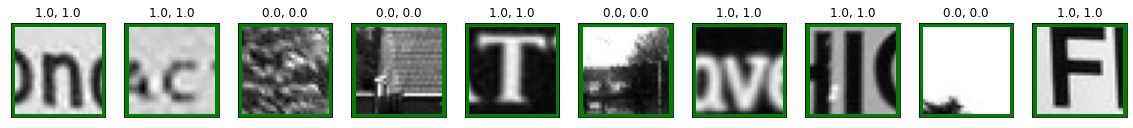

In [39]:
nImages = 10 # We will display nImages

fig, axs = plt.subplots(1, nImages, figsize = (2 * nImages, 2))

# Choose nImages random indices from the test set, and then pass the corresponding images through our model
idxs = np.random.randint(0, test_images.shape[0], size = nImages)
out = clf.predict(test_features[idxs])

# Draw
for ax, i, o in zip(axs, idxs, out):
    ax.imshow(np.reshape(test_images[i, :],[32,32]), cmap=plt.cm.gray)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("{}, {}".format(o, test_labels[i]))
    rect = patches.Rectangle((0, 0), 31, 31, linewidth=5, edgecolor=("green" if o == test_labels[i] else "red"), facecolor= "none")
    ax.add_patch(rect)